<a href="https://colab.research.google.com/github/XavierCarrera/movie-budget-prediction/blob/main/Ensembles_and_Hyperparameters_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter("ignore")

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [4]:
model = DecisionTreeRegressor(max_depth=2)

In [6]:
X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/db/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [ ]:
model.fit(X_train,y_train)

In [9]:
treedot = export_graphviz(model,
                         out_file=None,
                         feature_names=X.columns)

In [ ]:
treedot

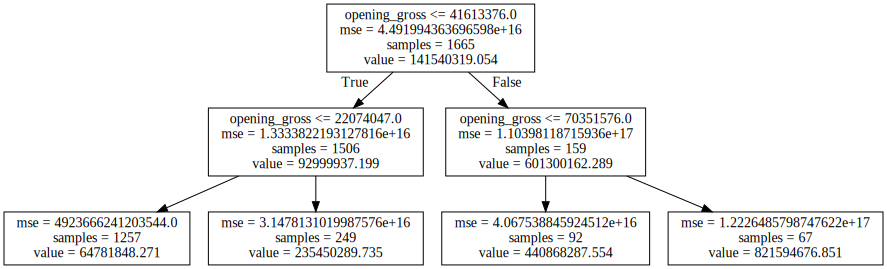

In [11]:
graphviz.Source(treedot)

# Ensembles

In [18]:
forest = RandomForestRegressor(200)
results = cross_validate(forest,X,y,cv=5,scoring='r2')

In [19]:
results

{'fit_time': array([2.07904625, 2.13254786, 2.1557107 , 2.14756441, 2.18161726]),
 'score_time': array([0.02332902, 0.02792239, 0.02623105, 0.02689362, 0.02566338]),
 'test_score': array([0.47105875, 0.69794205, 0.56943365, 0.41460778, 0.44175592])}

In [20]:
test_scores = results['test_score']
print(np.mean(test_scores))

0.5189596310989187


In [22]:
ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble,X,y,cv=5,scoring='r2')

In [24]:
test_scores = results['test_score']
print(np.mean(test_scores))

0.5256534935817939


# Hyperparameter Optimization

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
param_test1 = {'n_estimators': range(20,501,20)}

In [27]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [28]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

In [29]:
gsearch1 = GridSearchCV(estimator,
                       param_grid = param_test1,
                       scoring='r2',
                       cv=5)

In [30]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [32]:
list(zip(gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['std_test_score'], gsearch1.cv_results_['params']))

[(0.6553377167287445, 0.05763723230388878, {'n_estimators': 20}),
 (0.7194707183052496, 0.06255974658122894, {'n_estimators': 40}),
 (0.7347239263041044, 0.06359927761595936, {'n_estimators': 60}),
 (0.7389339055742862, 0.062364772765764416, {'n_estimators': 80}),
 (0.7420485206288181, 0.06271425977283825, {'n_estimators': 100}),
 (0.7459322395926498, 0.06235500960463639, {'n_estimators': 120}),
 (0.7495406754127887, 0.06335029572288611, {'n_estimators': 140}),
 (0.7508197586274827, 0.06304688375599073, {'n_estimators': 160}),
 (0.7525654539309128, 0.0634404813604329, {'n_estimators': 180}),
 (0.753490598609423, 0.06446653281824145, {'n_estimators': 200}),
 (0.7545692717605135, 0.06341510679393178, {'n_estimators': 220}),
 (0.7553059694284988, 0.06488882352873111, {'n_estimators': 240}),
 (0.755171486028867, 0.06572082397934954, {'n_estimators': 260}),
 (0.753885223323653, 0.06495415209551623, {'n_estimators': 280}),
 (0.7546023133872947, 0.06568746888772702, {'n_estimators': 300}),
 (

In [33]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train)

In [35]:
test_scores = final_results['test_score']
print(np.mean(test_scores))

0.7553059694284988


In [36]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=240)

In [37]:
estimator.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
estimator.score(X_test,y_test)

0.8092888852563106